In [252]:
include("../code/bp_full_gfq.jl")

gftables (generic function with 6 methods)

In [253]:
# Build a random graph with variables of degree exactly 2
# Inputs: size, rate

include("../code/ldpc_graph.jl")
function cycle_code(Q::Int, n::Int, R::Real; rng=MersenneTwister(0))
    @assert 0≤R≤1
    m = round(Int, n*(1-R))
    nedges, Lambda, Rho = generate_polyn(n,m,degree_type=:nodes)
    nedges = 2n
    H = permutedims(ldpc_matrix_gfq(Q,n,m,nedges,Lambda,Rho, accept_multi_edges=false,rng=rng))
end

cycle_code (generic function with 1 method)

In [299]:
Q = 8
n = 300
R = 0.5
A = cycle_code(Q, n, R)
s = rand(1:Q, n)
ms = ms_full_gfq(A, Q, s);

In [300]:
maxiter = 5*10^5
rein = 1e-4
parities=zeros(Int, maxiter)
dist=zeros(maxiter)
iteration_ms!(ms, damp=0.5, maxiter=maxiter, rein=rein, parities=parities, dist=dist, s=s)

(4.876505060963152e122, 500000)

In [301]:
x = argmax.(ms.belief)
parity(ms, x)

2

In [302]:
sum(mult_gfq(ms.H, x, Q))

2

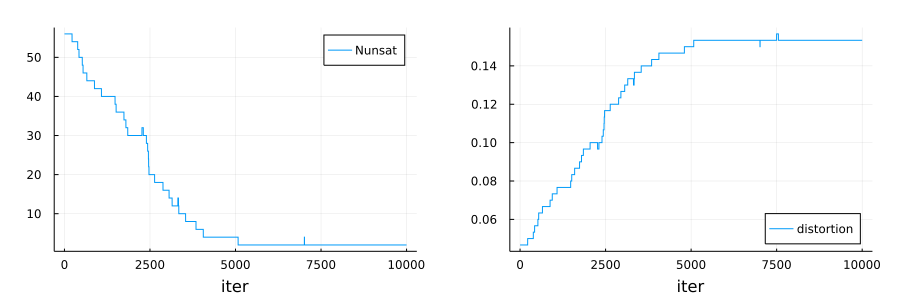

In [443]:
p1 = plot(parities, xlabel="iter", label="Nunsat")
p2 = plot(dist, xlabel="iter", label="distortion", legend=:bottomright)
plot(p1,p2, size=(900,300), margin=5Plots.mm)

In [304]:
d = distortion(x, s, Q)

0.12666666666666668

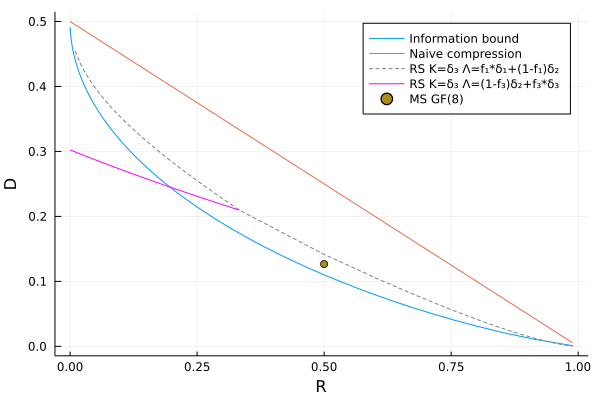

In [305]:
plot_rdb()
scatter!([R], [d], label="MS GF($Q)")

In [447]:
Q = 8
n = 300
R = 0.5
A = cycle_code(Q, n, R)
s = rand(1:Q, n)
H = 2;

In [455]:
maxiter = 10^4
rein = 1e-4
parities=fill(NaN, maxiter)
dist=fill(NaN,maxiter)
bp = bp_full_gfq(A, Q, s, H);

In [456]:
iteration!(bp, damp=0.0, maxiter=maxiter, rein=0.0, parities=parities, dist=dist, s=s, tol=1e-20)

(2.220446049250313e-16, 10000)

In [457]:
x = argmax.(bp.belief)
parity(bp, x)
[x s]

300×2 Matrix{Int64}:
 5  6
 3  3
 2  2
 5  5
 6  6
 5  5
 5  5
 8  3
 1  5
 3  3
 5  5
 5  5
 3  3
 ⋮  
 6  6
 6  2
 7  7
 2  6
 5  5
 2  2
 2  3
 2  1
 2  2
 3  3
 5  5
 7  7

In [439]:
iteration!(bp, damp=0.0, maxiter=maxiter, rein=rein, parities=parities, dist=dist, s=s, tol=1e-14)

(3.281124874527849e-5, 10000)

In [440]:
x = argmax.(bp.belief)
parity(bp, x)

2

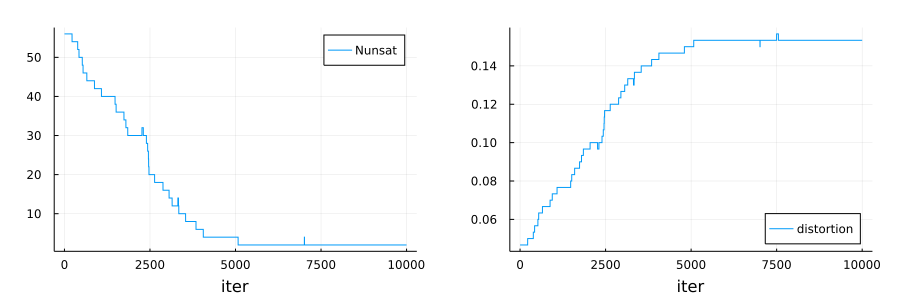

In [441]:
p1 = plot(parities, xlabel="iter", label="Nunsat")
p2 = plot(dist, xlabel="iter", label="distortion", legend=:bottomright)
plot(p1,p2, size=(900,300), margin=5Plots.mm)

In [442]:
d = distortion(x, s, Q)

0.15333333333333332

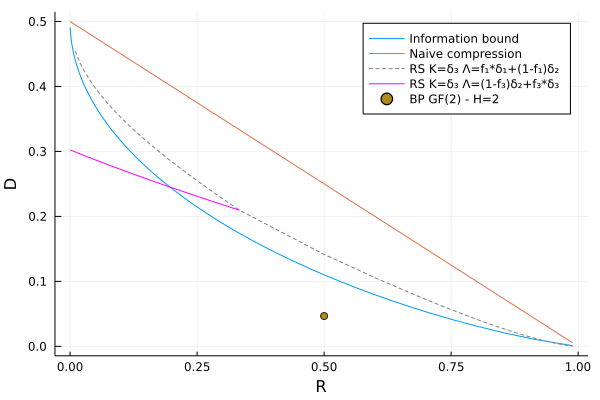

In [431]:
plot_rdb()
scatter!([R], [d], label="BP GF($Q) - H=$H")

## Varying the rate

In [384]:
Rho = [0,0,1]
f1s = 0.1:0.1:0.9
Rs = zeros(length(f1s))
navg = 10
d = [fill(NaN,navg) for f in f1s]
maxiter = 10^3
rein = 1e-3
damp = 0.0
maxtrials = 20
Q = 8
n = 300;

In [385]:
@showprogress for (i,f1) in pairs(f1s)
    Lambda = [f1, 1-f1]
    nedges = Int(n*(2-f1))
    m = nedges ÷ 3
    Rs[i] = 1 - m/n
    for j in 1:navg
        converged = false
        for t in 1:maxtrials
            A = permutedims(ldpc_matrix_gfq(Q,n,m,nedges,Lambda,Rho, accept_multi_edges=false))
            s = rand(1:Q, n)
            ms = ms_full_gfq(A, Q, s)
            ε, iters = iteration_ms!(ms, damp=damp, maxiter=maxiter, rein=rein)
            x = argmax.(ms.belief)
            p = parity(ms, x)
            if p == 0
                d[i][j] = distortion(x, s, Q)
                converged = true
                println("f1=$f1, avg $j, converged at trial $t")
                break
            end
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:10:56


f1=0.1, avg 1, converged at trial 3
f1=0.1, avg 2, converged at trial 1
f1=0.1, avg 3, converged at trial 1
f1=0.1, avg 4, converged at trial 6
f1=0.1, avg 5, converged at trial 3
f1=0.1, avg 6, converged at trial 3
f1=0.1, avg 7, converged at trial 5
f1=0.1, avg 8, converged at trial 1
f1=0.1, avg 9, converged at trial 7
f1=0.1, avg 10, converged at trial 1
f1=0.2, avg 1, converged at trial 1
f1=0.2, avg 2, converged at trial 4
f1=0.2, avg 3, converged at trial 11
f1=0.2, avg 5, converged at trial 12
f1=0.2, avg 6, converged at trial 7
f1=0.2, avg 7, converged at trial 2
f1=0.2, avg 8, converged at trial 5
f1=0.2, avg 10, converged at trial 2
f1=0.3, avg 1, converged at trial 10
f1=0.3, avg 2, converged at trial 2
f1=0.3, avg 3, converged at trial 4
f1=0.3, avg 4, converged at trial 3
f1=0.3, avg 7, converged at trial 7
f1=0.3, avg 8, converged at trial 9
f1=0.3, avg 9, converged at trial 6
f1=0.3, avg 10, converged at trial 15
f1=0.4, avg 2, converged at trial 8
f1=0.4, avg 8, conver

In [390]:
d_avg = mean.(d)

9-element Vector{Float64}:
   0.18344444444444447
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN
 NaN

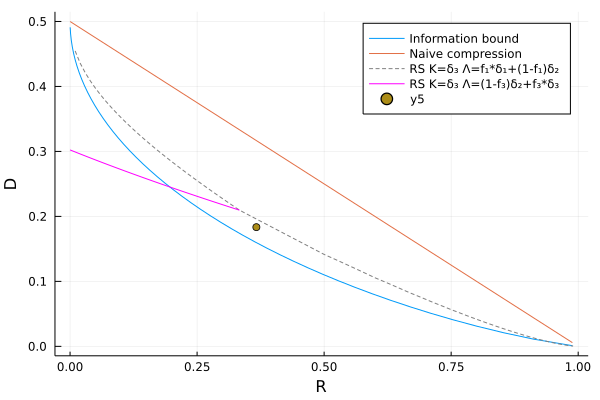

In [393]:
pl = plot_rdb()
scatter!(pl, Rs, d_avg)

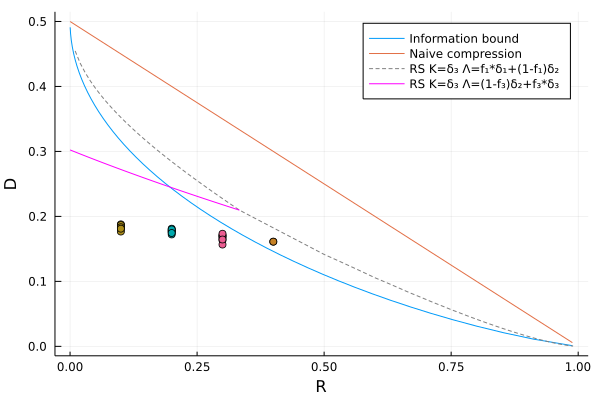

In [395]:
pl = plot_rdb()
for (i,f1) in pairs(f1s)
    idx = .!isnan.(d[i])
    scatter!(pl, f1*ones(navg)[idx], d[i][idx], label="")
end
pl

In [378]:
Rho = [0,0,1]
f1s = 0.1:0.01:0.9
Rs = zeros(length(f1s))
navg = 10
d2 = [fill(NaN,navg) for r in Rs]
maxiter = 10^4
rein = 1e-5
damp = 0.0
maxtrials = 20
Q = 2
n = 300;

In [387]:
@showprogress for (i,f1) in pairs(f1s)
    Lambda = [f1, 1-f1]
    nedges = Int(n*(2-f1))
    m = nedges ÷ 3
    Rs[i] = 1 - m/n
    for j in 1:navg
        converged = false
        for t in 1:maxtrials
            A = permutedims(ldpc_matrix_gfq(Q,n,m,nedges,Lambda,Rho, accept_multi_edges=false))
            s = rand(1:Q, n)
            ms = ms_full_gfq(A, Q, s)
            ε, iters = iteration_ms!(ms, damp=damp, maxiter=maxiter, rein=rein)
            x = argmax.(ms.belief)
            p = parity(ms, x)
            if p == 0
                d2[i][j] = distortion(x, s, Q)
                converged = true
                println("f1=$f1, avg $j, converged at trial $t")
                break
            end
        end
    end
end

Progress:  33%|█████████████▋                           |  ETA: 0:04:37

f1=0.1, avg 1, converged at trial 1
f1=0.1, avg 2, converged at trial 2
f1=0.1, avg 3, converged at trial 1
f1=0.1, avg 4, converged at trial 2
f1=0.1, avg 5, converged at trial 3
f1=0.1, avg 6, converged at trial 2
f1=0.1, avg 7, converged at trial 3
f1=0.1, avg 8, converged at trial 2
f1=0.1, avg 9, converged at trial 3
f1=0.1, avg 10, converged at trial 3
f1=0.2, avg 1, converged at trial 2
f1=0.2, avg 2, converged at trial 13
f1=0.2, avg 3, converged at trial 18
f1=0.2, avg 4, converged at trial 1
f1=0.2, avg 7, converged at trial 3
f1=0.2, avg 8, converged at trial 7
f1=0.2, avg 9, converged at trial 2
f1=0.2, avg 10, converged at trial 2
f1=0.3, avg 1, converged at trial 8
f1=0.3, avg 3, converged at trial 15
f1=0.3, avg 4, converged at trial 13
f1=0.3, avg 7, converged at trial 13
f1=0.3, avg 8, converged at trial 2
f1=0.3, avg 9, converged at trial 2


LoadError: InterruptException:

In [388]:
pl2 = plot_rdb()
for (i,f1) in pairs(f1s)
    scatter!(pl2, f1*ones(navg), d2[i], label="")
end
pl2

ArgumentError: ArgumentError: reducing over an empty collection is not allowed